### **lightning ai 4 cpu 기반**
- ### **한글깨짐 방지**
- **1. 년도별_상위출현단어처럼 차수별 상위출현단어, 전체년도 합쳐서 상위출현단어 볼 수 있는지 여쭤보기**

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,718 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **재 시작**

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import gzip
import pickle
import os

# 현재 디렉토리를 확인합니다.
current_dir = '/content/drive/MyDrive/이대과제/data_gzip'

# 파일 리스트를 가져옵니다.
file_list = [f for f in os.listdir(current_dir) if f.endswith('.pkl.gz')]

# 빈 데이터프레임 리스트를 생성합니다.
df_list = []

# 각 gzip 파일을 읽어 데이터프레임으로 변환하고 리스트에 추가합니다.
for file in file_list:
    try:
        with gzip.open(os.path.join(current_dir, file), 'rb') as f:
            data = pickle.load(f)
            df = pd.DataFrame(data)
            if not df.empty:
                df_list.append(df)
            else:
                print(f"Empty DataFrame in file: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# 빈 리스트가 아닌지 확인합니다.
if df_list:
    # 모든 데이터프레임을 하나로 합칩니다.
    df = pd.concat(df_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

print(df.shape)

### **<font color='red'> test_Start**

In [3]:
import pandas as pd
import numpy as np
import gzip
import pickle
import os

In [4]:
path = '/content/drive/MyDrive/이대과제/data_gzip/chunk_11.pkl.gz'
with gzip.open(path, 'rb') as f:
    data = pickle.load(f)
    df = pd.DataFrame(data).sample(frac=0.1)

print(df.shape)

(35700, 8)


## **<font color='red'> test- END**

In [5]:
# 동일 기사 삭제
import numpy as np

df = df[~df.duplicated(['일자', '언론사', '제목'])]

# Function to extract text after '>'
def extract_text_after_symbol(text, symbol='>'):
    if isinstance(text, str):
        return text.split(symbol)[-1]
    return text

# Applying the function to each column using applymap
df[['통합 분류1', '통합 분류2', '통합 분류3']] = df[['통합 분류1', '통합 분류2', '통합 분류3']].applymap(lambda x: extract_text_after_symbol(x))

# 지역 구분
region = ['서울', '경기', '인천', '경북', '대구', '경남', '부산', '울산', '충남', '충북', '대전',
          '전북', '전남', '광주', '강원', '제주', ]

# sample데이터에서 region에 해당하는 값이 처음으로 나오는 데이터값만  갖는 새로운컬럼
df['지역'] = df.apply(lambda x: x['통합 분류1'] if x['통합 분류1'] in region else (x['통합 분류2'] ##
                                                                                  if x['통합 분류2'] in region else (x['통합 분류3'] ##
                                                                                                                 if x['통합 분류3'] in region else np.nan)), axis=1)
# 지역이 있는 행만 선택
df.dropna(subset=['지역'], inplace=True)

# 필요컬럼만 추출
df= df[['일자', '특성추출(가중치순 상위 50개)', '지역']]

# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)

df

,일자,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,"제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,"제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,"송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,"아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,"3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1
...,...,...,...,...,...
7140009,2024-05-21,"서울,서울시,박람회,뚝섬한강공원,한강,102만,최단기간,특별전,나들,이수연,본행사,...",전남,2024,5
7140012,2024-05-21,"용인삼계고,용인삼계고등학교,통학버스,대한민국,도서관,기념식,운동장,학생들,이상일,김...",대전,2024,5
7140019,2024-05-21,"가평,보건소,행사장,부스,피크닉콘서트,방문객,치매조기,건강놀이터,운동체험,가평군청,...",충북,2024,5
7140026,2024-05-21,"통학버스,교육장,상반기,안전사고,지원청,노선점검,창녕교육지원청,농기계,창녕,학부모,...",충남,2024,5


### **1. 지역별 년도별 검색어**

<Axes: >

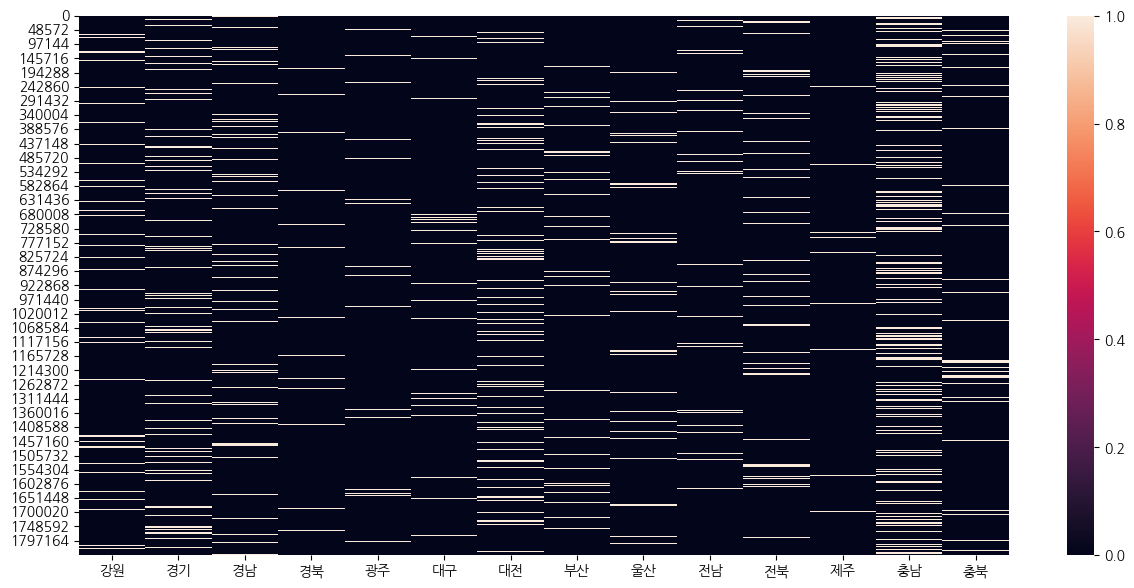

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corpus = []
for text in df['지역']:
    corpus.append(text)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
plt.figure(figsize=(15, 7))
sns.heatmap(data)

<Axes: xlabel='년도', ylabel='지역'>

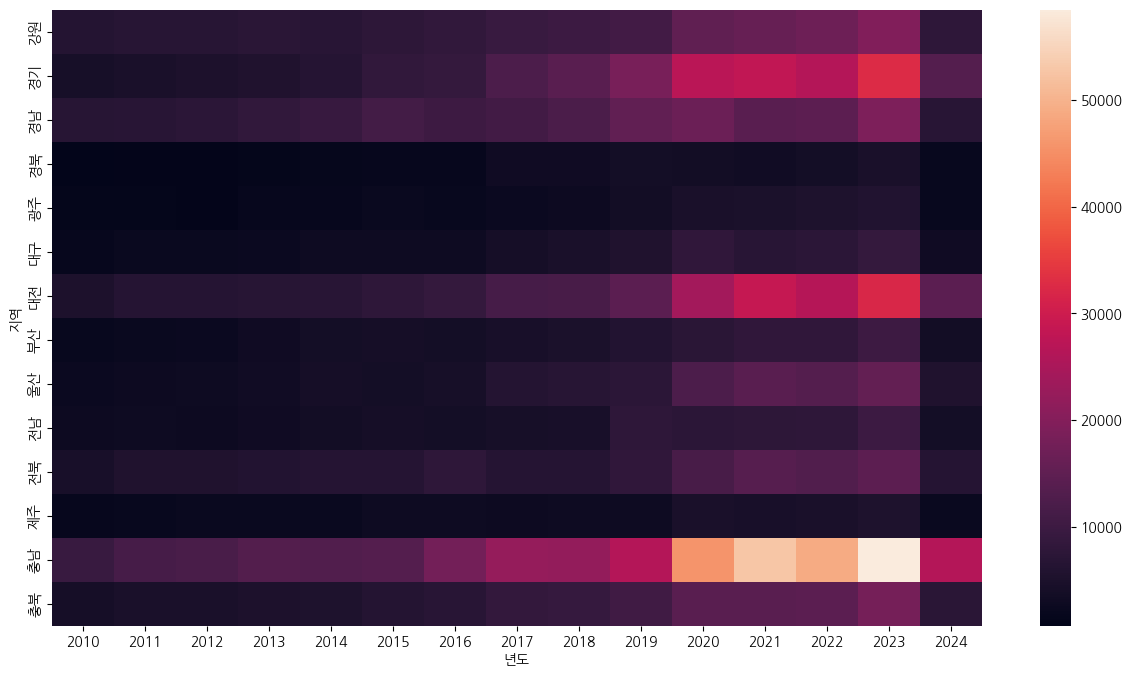

In [7]:

# Create a pivot table with year as columns and region as rows
pivot_table = pd.pivot_table(df, index='지역', columns='년도', values='특성추출(가중치순 상위 50개)', aggfunc='count')

# Print the pivot table
# Set the figure size
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table)

In [8]:
# df['일자']를 날짜로 변경하고 index로 지정
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)
df.head()

,일자,특성추출(가중치순 상위 50개),지역,년도,월
5,2010-01-01,"제주어,제주,제주대,국립국어원,전라도,관광객,문화유산,전문가,김석주,국어문화원,학교...",제주,2010,1
6,2010-01-01,"제주,용천수,물산업,수자원,제주워터,산물여행,제주물산업,육성사업,추진중,지하수,관리...",제주,2010,1
8,2010-01-01,"송년회,경남메세나협의회,진주,창원,신텍,문화송년회,김해,문동성,장유,외국인,결연단체...",경남,2010,1
9,2010-01-01,"아침밥,부산,중학교,아이들,겨울방학,호랑이띠,아침돌봄교실,고등학교,컵라면,보육강사,...",경기,2010,1
12,2010-01-01,"3선,완도군수,차용우,김종식,완도,전남도,박현호,군의원,후보군,본부장,농수산식품부,...",경남,2010,1


### **검색어 정리하기**

In [9]:
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)

keywords_df

,제1차 어린이식생활안전관리 종합계획 (2010~2012),제2차 어린이식생활안전관리 종합계획 (2013~2015),제3차 어린이식생활안전관리 종합계획 (2016~2018),제4차 어린이식생활안전관리 종합계획 (2019~2021),제5차 어린이식생활안전관리 종합계획 (2022~2024),제6차 어린이식생활안전관리 종합계획 수립 추진계획 (2025~2027)
1,안전한 식품,식품안전보호구역,고카페인 식품,식품안전,기호식품,기호식품
2,바른 영양,기호식품,알레르기 표시,기호식품,단체급식,단체급식
3,건강한 어린이,단체급식,광고 제한,단체급식,저염식품,영양표시
4,기호식품,영양표시,급식관리지원센터,저염식품,저당식품,고열량 식품
5,단체급식,식생활교육,저당음료,알레르기 식품,알레르기,자율협약
6,영양교육,협력강화,영양교육,영양교육,스마트 급식관리,빅데이터
7,식품표시,지자체 지원,나트륨 저감화,빅데이터,빅데이터,영양교육
8,HACCP,예방관리,영양표시 개선,광고 관리,광고 제한,안전관리
9,식중독 예방,식품안전성,식품안전성,안전관리,온라인 환경,식품안전법
10,품질관리,위생수준,급식위생,영양표시,맞춤형 지원,식중독 예방


In [10]:
# 데이터프레임을 원하는 구조로 변경
melted_df = keywords_df.melt(var_name="계획", value_name="내용")
# 계획 컬럼에서 계획 번호만 추출
melted_df["계획"] = melted_df["계획"].str.extract(r'(제\d차)')
# 컬럼 이름 변경 및 순서 변경
result_df = melted_df.rename(columns={"내용": "컬럼1", "계획": "컬럼2"})[['컬럼1', '컬럼2']]
result_df.columns = ['검색어', '계획']
# 추가 검색어 from 이대
search_words = ['당류', '나트륨', '어린이기호식품', '아동청소년 식품구입', '스쿨존', '학원주변',
                '우수판매업소', '건강먹거리코너', '지속가능한 식생활', '어린이급식관리지원센터', '튼튼버스']
extra_df = pd.DataFrame(search_words, columns=['검색어']); extra_df['계획'] = '추가'
final_df = pd.concat([result_df, extra_df]).reset_index(drop=True)
# final_df의 검색어 컬럼의 각 단어는 space로 분리하여 다른 행으로 만들기
final_df = final_df.assign(검색어=final_df['검색어'].str.split(' ')).explode('검색어')
import io
af = pd.read_csv(io.StringIO('''
저염
저당
학원가
편의점
광고제한
'''), header=None)
af.columns = ['검색어']; af['계획'] = '혜진'
bf = pd.concat([final_df, af]); bf.index = range(len(bf))
bf

,검색어,계획
0,안전한,제1차
1,식품,제1차
2,바른,제1차
3,영양,제1차
4,건강한,제1차
...,...,...
279,저염,혜진
280,저당,혜진
281,학원가,혜진
282,편의점,혜진


### 불용어는 필요없을 것임 검색어만 보면 되니까~

## **0. 6개 키워드(기호식품, 알레르기, 저염, 저당, 고카페인, 급식관리지원센터)에 대한 2010-2024년까지의 추이는 예시 사진 그래프처럼 표현이 가능할지 여쭤보기**

In [11]:
zf = df.copy()

- 6개 키워드(기호식품, 알레르기, 저염, 저당, 고카페인, 급식관리지원센터)에 대한 2010-2024년까지의 추이는 예시 사진 그래프처럼 표현이 가능할지 여쭤보기(등고선)

In [12]:
# The given text
text = "기호식품, 알레르기, 저염, 저당, 고카페인, 급식관리지원센터"
# Split the text by comma and strip any leading/trailing whitespace
keywords = [term.strip() for term in text.split(',')]

# Print the resulting list

# Extracting keywords and counting their occurrences
regions = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '울산', '전남', '전북', '제주', '충남', '충북']

### **검색어 시공간 시각화를 위한 기간 설정**

In [13]:
from tqdm import tqdm


start_year = 2010
end_year = 2024

# Create an empty DataFrame for the desired output
output_df = pd.DataFrame(columns=['terra_keyword', 'keyword'] + list(range(start_year, end_year+1)))

# Populating the output DataFrame
for region in tqdm(regions):
    for keyword in keywords:
        row = {'terra_keyword': region, 'keyword': keyword}
        for year in range(start_year, end_year+1):
            row[year] = df[(df['년도'] == year) & (df['특성추출(가중치순 상위 50개)'].str.contains(keyword)) & (df['지역'] == region)].shape[0]
        output_df = pd.concat([output_df, pd.DataFrame([row])], ignore_index=True)

output_df

100%|██████████| 14/14 [23:32<00:00, 100.88s/it]


,terra_keyword,keyword,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,강원,기호식품,8,16,18,8,5,9,18,17,14,19,14,15,12,14,10
1,강원,알레르기,9,14,24,18,9,17,21,12,19,23,14,28,12,16,3
2,강원,저염,5,10,8,22,16,20,15,11,12,13,7,7,8,3,3
3,강원,저당,1,2,2,0,1,4,1,4,9,10,5,7,1,5,0
4,강원,고카페인,0,0,9,1,1,2,1,0,1,1,3,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,충북,알레르기,2,7,1,5,2,5,3,4,6,9,8,4,10,8,5
80,충북,저염,1,12,14,17,27,11,15,25,27,27,17,11,8,14,17
81,충북,저당,0,1,0,0,0,1,2,5,3,7,10,5,6,3,1
82,충북,고카페인,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
# 결과 파일 저장하기(시각화를 위한 파)
output_df.to_excel('output_df.xlsx')

### **검색어별 등고선 그리고 저장하기**

In [17]:
tf = output_df.copy()

In [18]:
from scipy.interpolate import griddata
import os

# 그림 그리는 함수
def plot_contourf(sf, text) :
    # Melt the DataFrame to have years as a separate column
    temp_melted = sf.melt(id_vars=['terra_keyword', 'keyword'], var_name='Year', value_name='Value')

    # Pivot the DataFrame to create a matrix suitable for contour plot
    temp_pivot = temp_melted.pivot_table(index=['terra_keyword', 'keyword'], columns='Year', values='Value', fill_value=0)

    # Check if the pivoted DataFrame is empty
    if temp_pivot.empty:
        print(f"Warning: No data for keyword '{text}'. Skipping contour plot.")
        return  # Skip plotting if no data

    # Interpolating the data for smoother contours
    xi = np.linspace(0, len(temp_pivot.columns) - 1, 100)
    yi = np.linspace(0, len(temp_pivot.index) - 1, 100)
    XI, YI = np.meshgrid(xi, yi)

    # Flatten the data for interpolation
    x = np.arange(len(temp_pivot.columns))
    y = np.arange(len(temp_pivot.index))
    X, Y = np.meshgrid(x, y)
    Z = temp_pivot.values

    # Interpolate the data
    ZI = griddata((X.flatten(), Y.flatten()), Z.flatten(), (XI, YI), method='cubic')

    # Generate the contour plot with interpolation
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the contour plot
    contour = ax.contourf(XI, YI, ZI, cmap='viridis')
    fig.colorbar(contour)

    # Set the labels
    ax.set_xticks(np.linspace(0, len(temp_pivot.columns) - 1, len(temp_pivot.columns)))
    ax.set_xticklabels(temp_pivot.columns, rotation=45)
    ax.set_yticks(np.linspace(0, len(temp_pivot.index) - 1, len(temp_pivot.index)))
    ax.set_yticklabels(temp_pivot.index)
    ax.set_xlabel('Year')
    ax.set_ylabel('Region/Keyword')
    ax.set_title('Monthly Frequency Contour by Region and Keyword (Interpolated)')

    # Construct the file path relative to the current working directory
    file_path = os.path.join('images', f'{text}_시공간_등고선.png')
    # Ensure the directory exists before saving
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # Save the figure
    plt.savefig(file_path)

    plt.show()

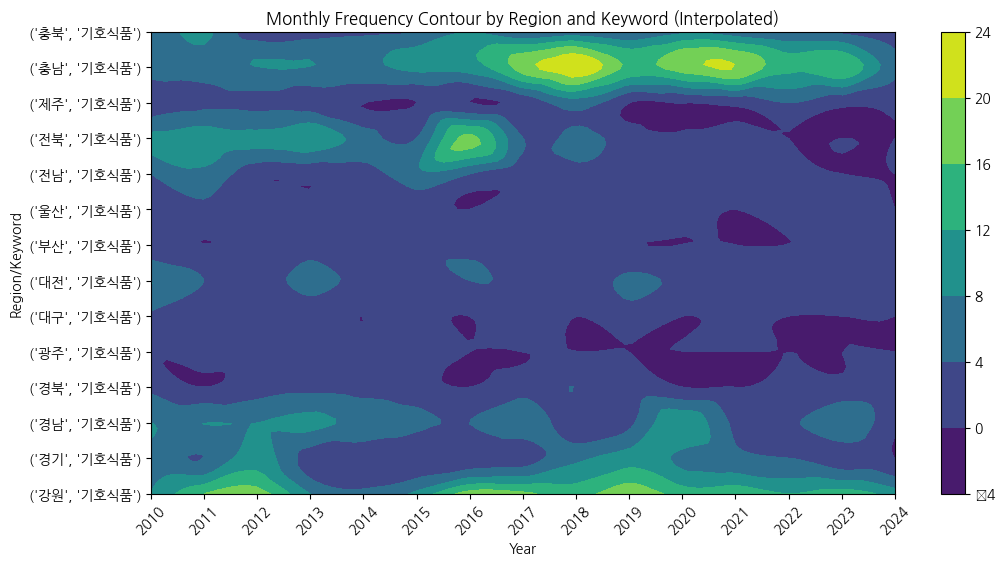

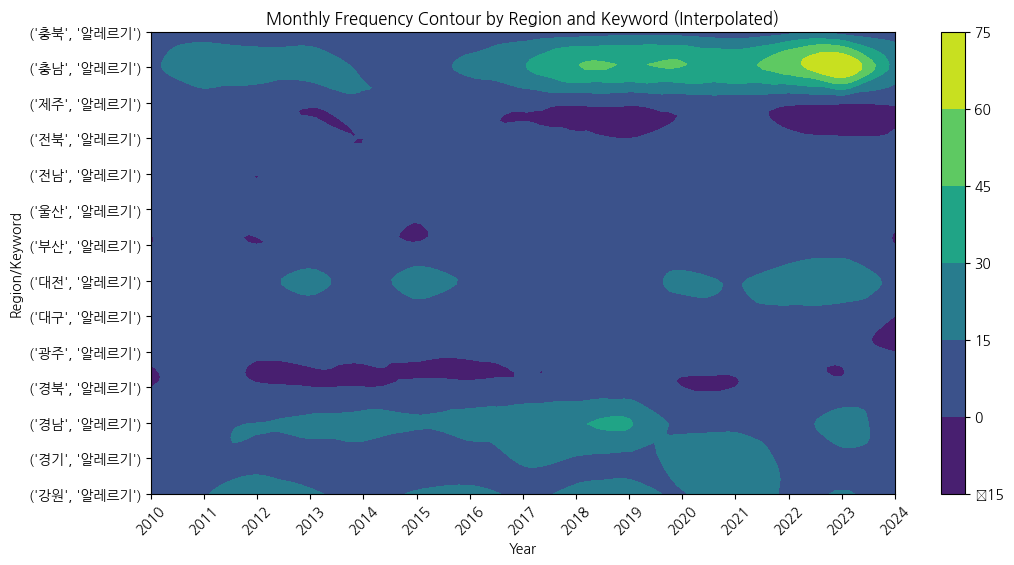

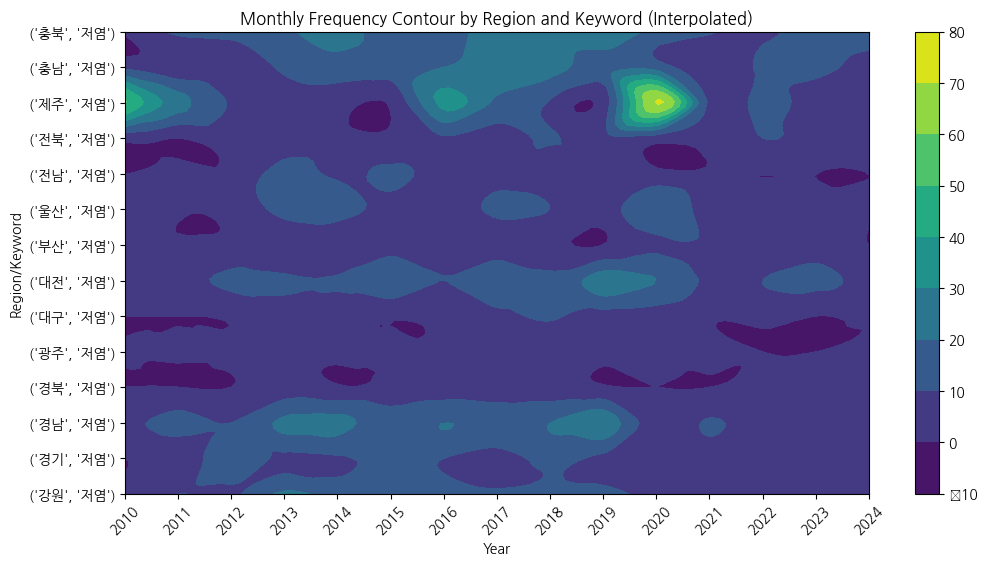

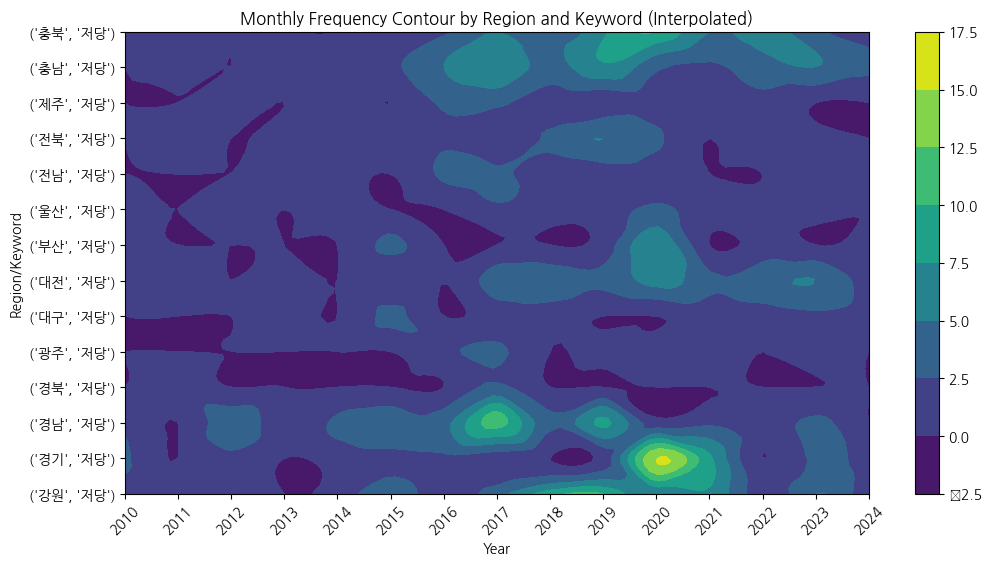

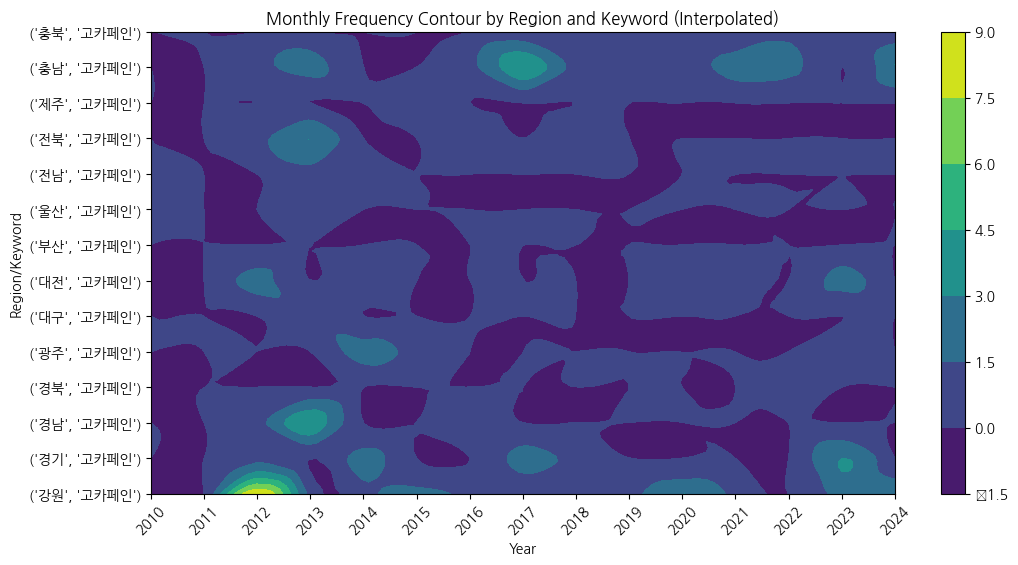

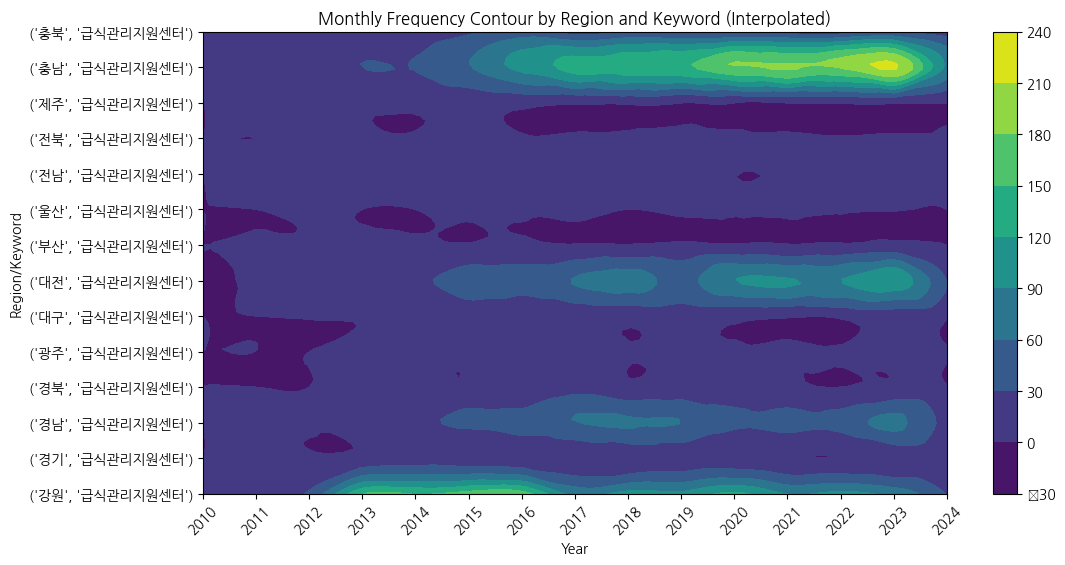

In [19]:
for text in keywords:
    plot_contourf(tf[tf['keyword'] == text], text)

In [25]:
for text in keywords[:2]:
    display(tf[tf['keyword'] == text].head())

,terra_keyword,keyword,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,강원,기호식품,8,16,18,8,5,9,18,17,14,19,14,15,12,14,10
6,경기,기호식품,7,4,10,2,1,1,1,2,7,10,7,5,4,2,0
12,경남,기호식품,8,8,8,9,7,5,4,7,1,3,11,3,3,7,1
18,경북,기호식품,3,0,2,3,2,1,0,2,4,2,0,0,1,1,1
24,광주,기호식품,0,2,2,3,1,3,0,0,0,0,0,0,0,0,0


,terra_keyword,keyword,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,강원,알레르기,9,14,24,18,9,17,21,12,19,23,14,28,12,16,3
7,경기,알레르기,1,12,12,7,7,7,6,17,14,12,20,26,11,11,4
13,경남,알레르기,13,13,15,18,20,16,21,25,29,31,11,10,6,22,2
19,경북,알레르기,0,4,1,0,0,2,2,3,4,5,0,0,4,2,3
25,광주,알레르기,2,1,1,3,2,1,1,4,2,2,3,2,2,1,0


고카페인


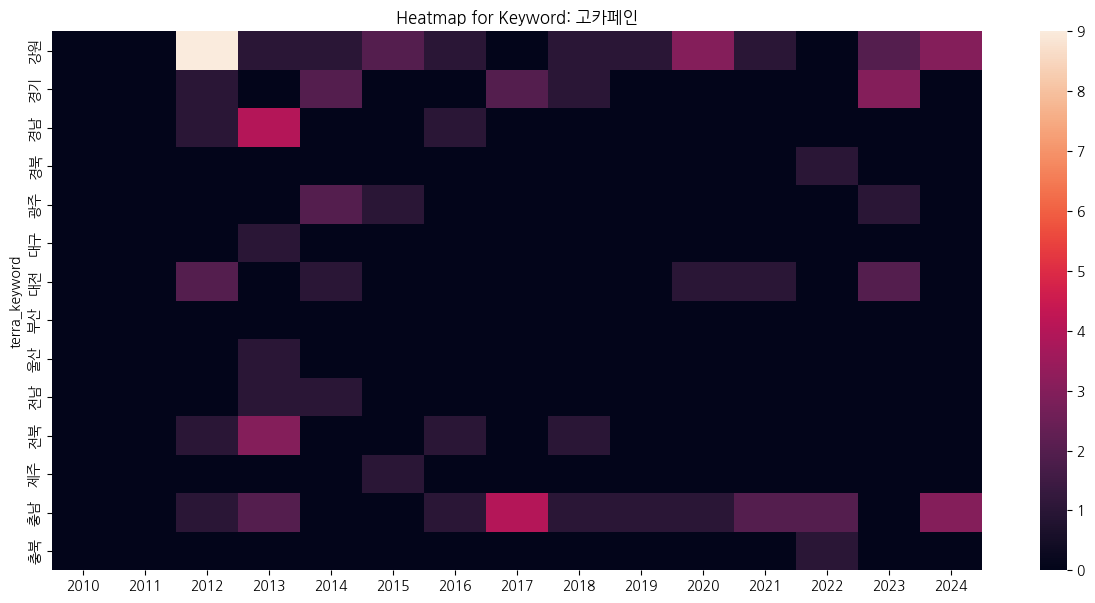

급식관리지원센터


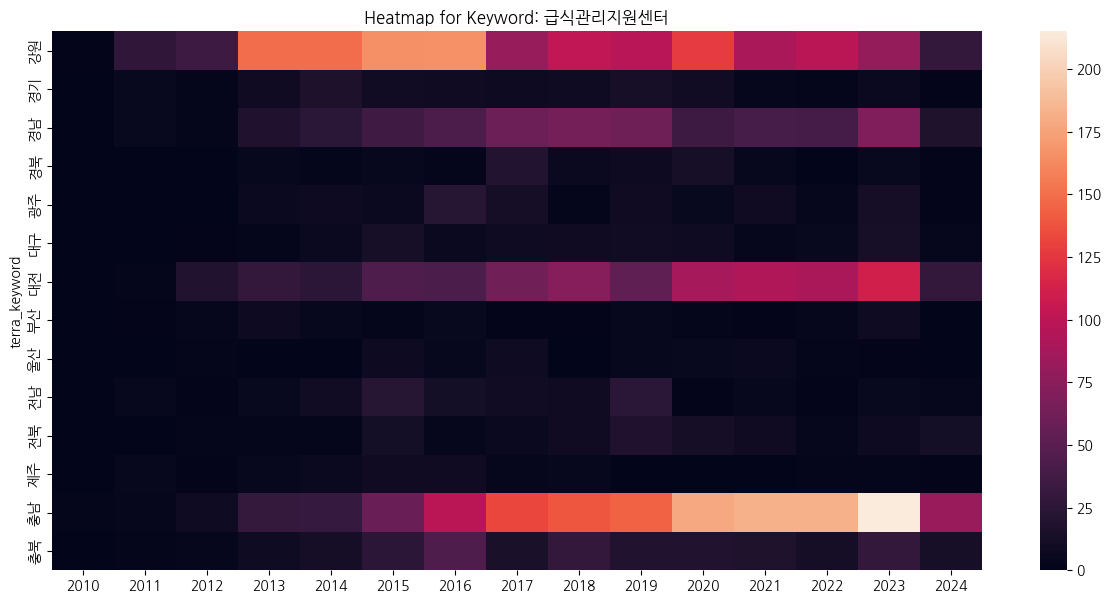

기호식품


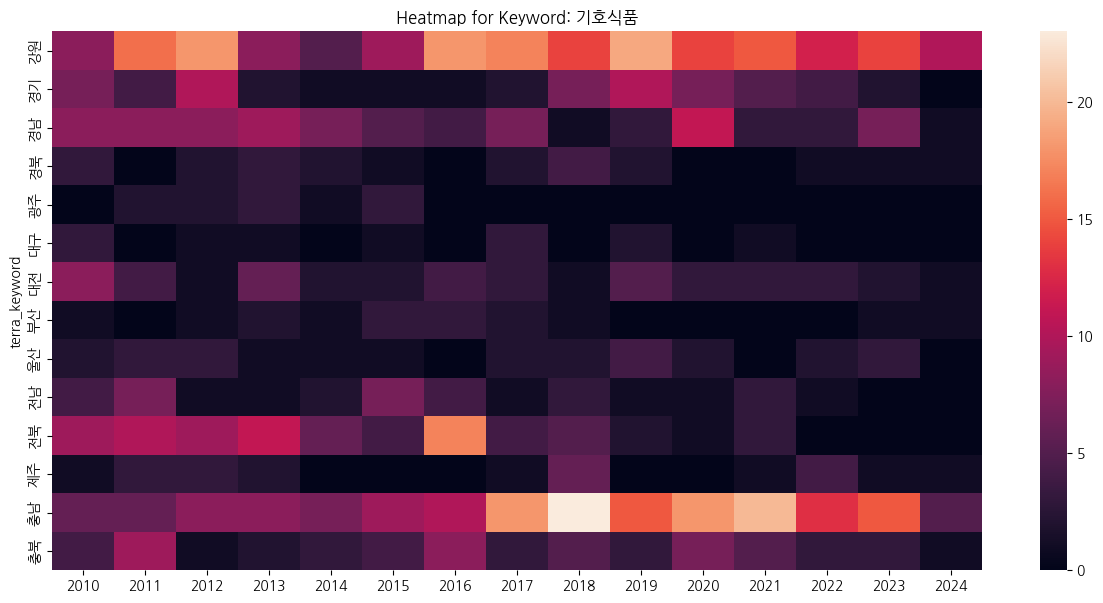

알레르기


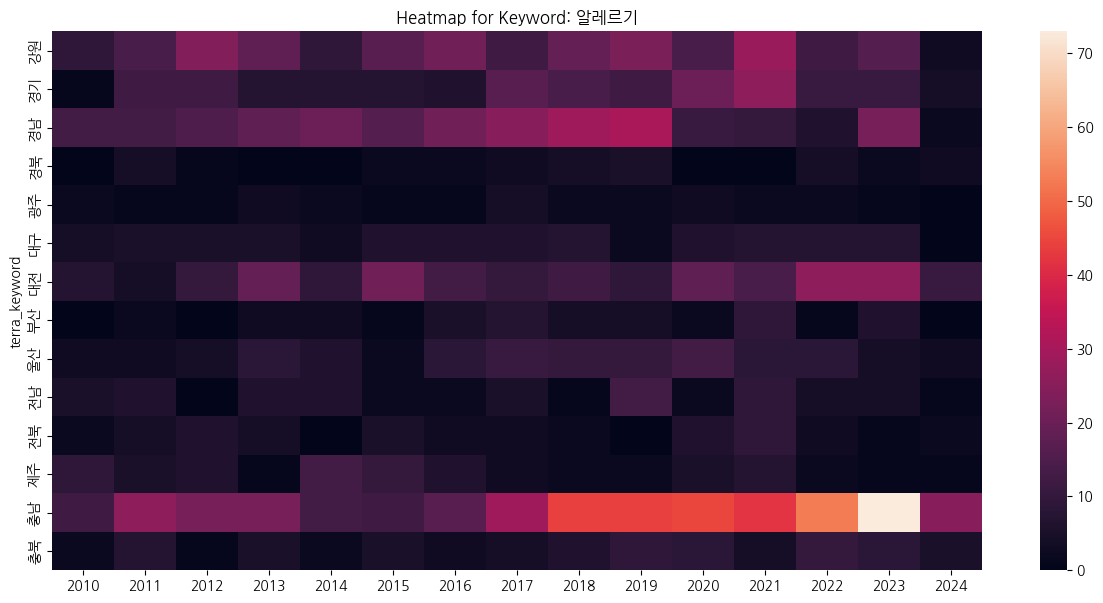

저당


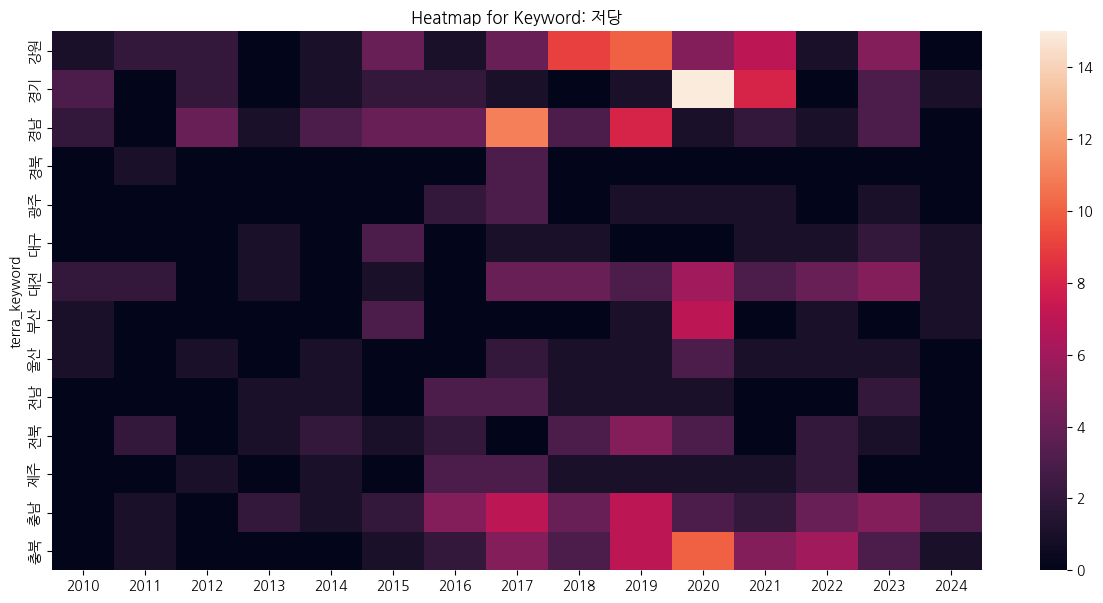

저염


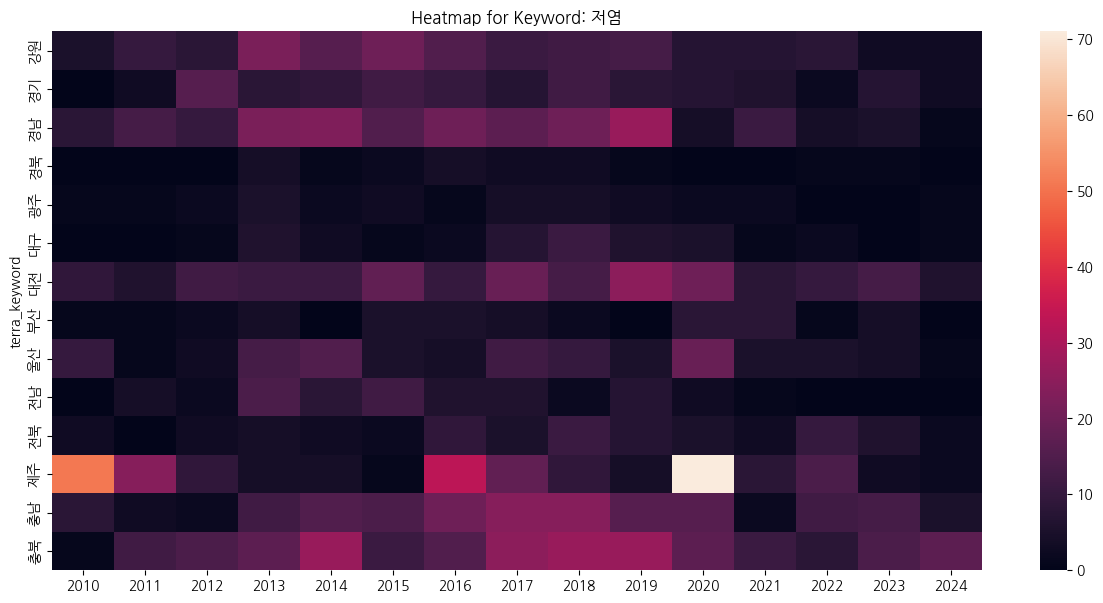

In [50]:
for r, g in tf.groupby('keyword'):
    print(r)
    h = g.drop(columns=['keyword'], axis=1).set_index('terra_keyword')
    # Convert all columns to integers
    h = h.apply(pd.to_numeric, errors='coerce')
    plt.figure(figsize=(15, 7))
    sns.heatmap(h)
    plt.title(f"Heatmap for Keyword: {r}")
    plt.savefig(f'images/heatmap_{r}.png')
    plt.show()

### **line plottting**

In [20]:
line_df = output_df.groupby(['keyword']).sum().drop('terra_keyword', axis=1)
line_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
keyword,,,,,,,,,,,,,,,
고카페인,0,0,15,13,7,4,4,6,4,2,5,4,4,8,6
급식관리지원센터,3,53,79,273,294,412,465,424,455,463,504,462,444,563,192
기호식품,64,72,68,59,38,50,69,65,72,66,64,59,46,49,21
알레르기,69,106,107,119,93,107,114,139,156,166,153,175,149,182,60
저당,10,9,10,7,11,21,24,47,30,46,56,31,23,31,8
저염,97,78,84,146,137,121,154,162,160,149,184,73,77,73,42


In [21]:
line_df.reset_index()

,keyword,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,고카페인,0,0,15,13,7,4,4,6,4,2,5,4,4,8,6
1,급식관리지원센터,3,53,79,273,294,412,465,424,455,463,504,462,444,563,192
2,기호식품,64,72,68,59,38,50,69,65,72,66,64,59,46,49,21
3,알레르기,69,106,107,119,93,107,114,139,156,166,153,175,149,182,60
4,저당,10,9,10,7,11,21,24,47,30,46,56,31,23,31,8
5,저염,97,78,84,146,137,121,154,162,160,149,184,73,77,73,42


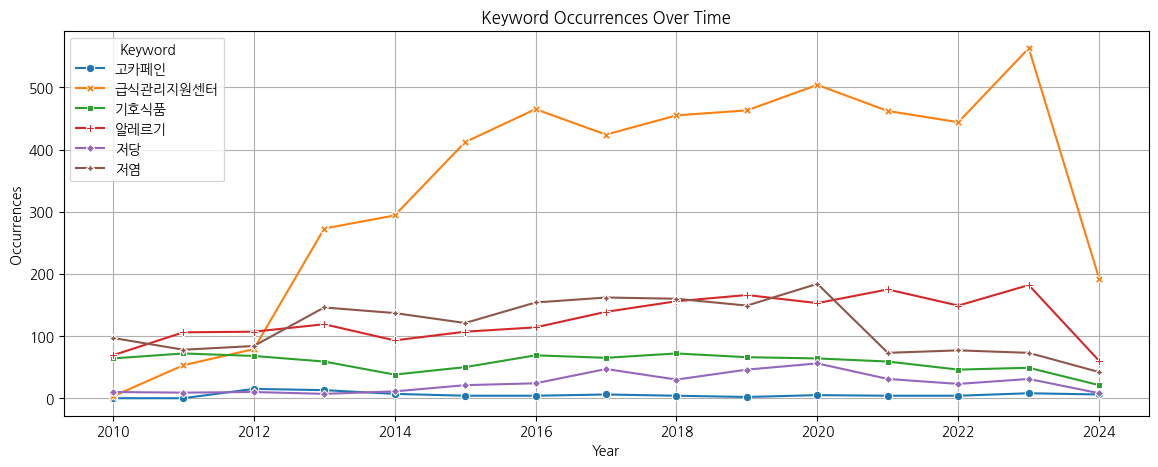

In [22]:
# Melting the DataFrame to long-form for seaborn
melted_df = line_df.reset_index().melt(id_vars='keyword', var_name='Year', value_name='Count')

# Convert 'Year' to numeric
melted_df['Year'] = melted_df['Year'].astype(int)

# Plotting
plt.figure(figsize=(14, 5))
sns.lineplot(data=melted_df, x='Year', y='Count', hue='keyword', style='keyword', markers=True, dashes=False)
plt.title('Keyword Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.legend(title='Keyword')
plt.grid(True)

# Save the figure
plt.savefig('interpolated_line_plot.png')

# Show the plot
plt.show()

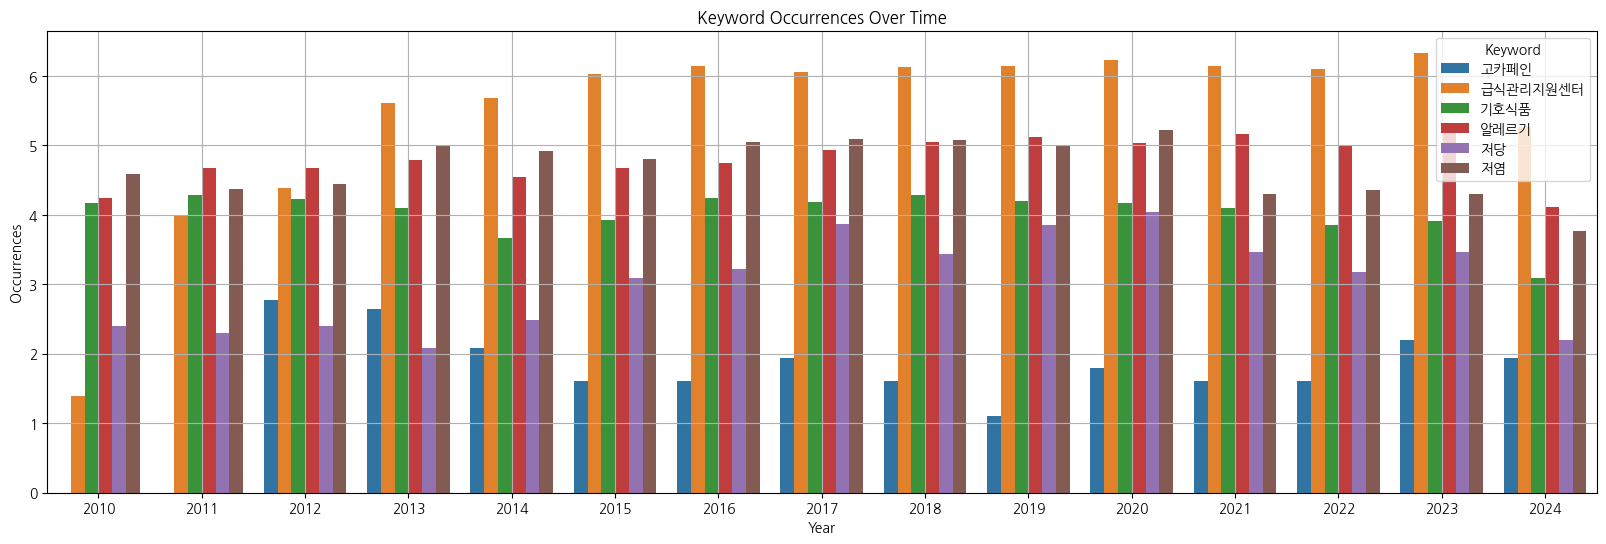

In [23]:
# Convert 'Year' to numeric
melted_df['Year'] = melted_df['Year'].astype(int)
melted_df['Count'] = np.log(melted_df['Count'].astype(float).values +1 )
plt.figure(figsize=(20, 6))
sns.barplot(data=melted_df, x='Year', y='Count', hue='keyword') # Removed style argument
plt.title('Keyword Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.legend(title='Keyword')
plt.grid(True)
# Save the figure
plt.savefig('interpolated_bar_plot_log.png')

# Show the plot
plt.show()

## **3. 종합계획 차수별 년도별 검색어 출현빈도**
### **corpus정제 사용자함수**

In [51]:
# corpus 정제
import re

def preprocess_corpus(corpus):
    updated_corpus = []
    pattern_mixed = re.compile(r'(?=.*\d)(?=.*[a-zA-Z가-힣])')
    pattern_korean_english = re.compile(r'^[가-힣a-zA-Z]+$')

    for document in corpus:
        if isinstance(document, str):
            words = document.split(',')
            filtered_words = [word for word in words if pattern_korean_english.match(word) and not pattern_mixed.search(word)]
            updated_corpus.append(','.join(filtered_words))
        else:
            updated_corpus.append('')
    return updated_corpus

In [64]:
## 검색어 뽑기
keywords_df = pd.read_excel('/content/drive/MyDrive/이대과제/data/차수별 키워드(30개).xlsx').iloc[:31, ::2].iloc[1:, :]
for col in keywords_df:
    keywords_df[col] = keywords_df[col].str.replace(r'^\d+\.\s*', '', regex=True)
# Convert each column to a list
columns_as_lists = {col.split('어린이')[0].strip(): keywords_df[col].to_list() for col in keywords_df}
columns_as_lists.keys()

dict_keys(['제1차', '제2차', '제3차', '제4차', '제5차', '제6차'])

In [65]:
from collections import defaultdict
from tqdm import tqdm_notebook
result_dict = defaultdict(dict)

plans = list(columns_as_lists.keys())
# plans --> ['제1차', '제2차', '제3차', '제4차', '제5차', '제6차']
# 년도별로 반복
for key in tqdm_notebook(plans):
    # 시작년도, 끝년도 지정
    start_year = 2010
    end_year = 2024
    num = 500

    result_df = pd.DataFrame()

    # 관심주제어를 매년 키워드로 해서
    keyword_list = columns_as_lists[key]

    # 녇도별 문서 추출 후 키워드 빈도수 분석
    result_df1 = pd.DataFrame()

    # 년도에 해당되는 출현빈도
    for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
        print(f'{key} 어린이식생활안전관리 종합계획 {year}년도 데이터 처리중......')
        start_date = str(year) + "-01-01"
        end_date = str(year) + "-12-31"
        dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
        temp_df = df[dt_index]


        corpus_yearly = []
        for keywords in temp_df['특성추출(가중치순 상위 50개)']:
            corpus_yearly.append(keywords)

        # 각 년도별 corpus 정제
        cleaned_corpus_yearly = preprocess_corpus(corpus_yearly)

        s_corpus_str = "".join(cleaned_corpus_yearly)

        result_list = []

        for k in keyword_list:
            result_list.append(s_corpus_str.count(k))

        temp_df = pd.DataFrame(result_list,columns=[str(year)])
        result_df1 = pd.concat([result_df1,temp_df], axis=1)

    result_df1.index =  keyword_list

    display(result_df1)

    result_df1.to_excel(f'{key}' +'종합계획_키워드 추이' + '.xlsx')
    result_dict[key] = result_df1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

제1차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
바른 영양,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
건강한 어린이,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
영양교육,259,277,282,265,291,282,446,426,375,501,341,339,370,557,277
식품표시,1,4,0,2,1,0,2,3,1,4,6,14,3,12,6
HACCP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
품질관리,710,800,718,813,751,712,814,991,858,897,1135,1211,1162,1188,538


  0%|          | 0/15 [00:00<?, ?it/s]

제2차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전보호구역,55,46,46,33,48,38,40,39,30,27,26,26,14,34,15
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
영양표시,16,30,18,21,10,3,4,2,7,29,11,9,3,13,12
식생활교육,67,89,90,130,93,94,137,121,107,181,140,184,153,134,28
협력강화,38,64,82,75,68,55,71,62,77,82,49,70,56,75,24
지자체 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
예방관리,171,255,214,268,251,303,325,513,532,644,603,339,513,677,325
식품안전성,13,13,18,19,10,12,11,12,10,5,15,2,5,10,2
위생수준,51,85,45,67,35,45,57,87,125,113,97,55,48,52,11


  0%|          | 0/15 [00:00<?, ?it/s]

제3차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
고카페인 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
알레르기 표시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
급식관리지원센터,3,62,88,300,344,457,522,485,506,532,566,523,499,666,245
저당음료,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0
영양교육,259,277,282,265,291,282,446,426,375,501,341,339,370,557,277
나트륨 저감화,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양표시 개선,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
식품안전성,13,13,18,19,10,12,11,12,10,5,15,2,5,10,2
급식위생,41,38,41,31,17,16,42,23,18,37,34,22,27,14,7


  0%|          | 0/15 [00:00<?, ?it/s]

제4차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
식품안전,286,395,410,456,454,524,557,901,773,827,904,808,727,938,387
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
저염식품,0,0,0,1,2,2,0,0,0,1,0,0,0,0,0
알레르기 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
영양교육,259,277,282,265,291,282,446,426,375,501,341,339,370,557,277
빅데이터,0,2,39,197,730,1352,1771,3624,3685,4934,7062,6954,6014,5959,2103
광고 관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
안전관리,1636,1849,2072,2666,3655,3492,3935,4768,5103,5743,6227,6586,9225,9668,3918
영양표시,16,30,18,21,10,3,4,2,7,29,11,9,3,13,12


  0%|          | 0/15 [00:00<?, ?it/s]

제5차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
저염식품,0,0,0,1,2,2,0,0,0,1,0,0,0,0,0
저당식품,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0
알레르기,82,121,139,141,123,131,125,176,191,196,176,214,185,216,71
스마트 급식관리,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
빅데이터,0,2,39,197,730,1352,1771,3624,3685,4934,7062,6954,6014,5959,2103
광고 제한,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
온라인 환경,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
맞춤형 지원,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


  0%|          | 0/15 [00:00<?, ?it/s]

제6차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
영양표시,16,30,18,21,10,3,4,2,7,29,11,9,3,13,12
고열량 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자율협약,7,24,8,93,53,23,190,57,19,23,39,9,21,87,10
빅데이터,0,2,39,197,730,1352,1771,3624,3685,4934,7062,6954,6014,5959,2103
영양교육,259,277,282,265,291,282,446,426,375,501,341,339,370,557,277
안전관리,1636,1849,2072,2666,3655,3492,3935,4768,5103,5743,6227,6586,9225,9668,3918
식품안전법,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
result_df1

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
기호식품,66,72,70,61,41,51,69,66,77,67,68,59,46,50,22
단체급식,122,98,138,199,98,142,168,162,184,161,221,285,194,265,49
영양표시,16,30,18,21,10,3,4,2,7,29,11,9,3,13,12
고열량 식품,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자율협약,7,24,8,93,53,23,190,57,19,23,39,9,21,87,10
빅데이터,0,2,39,197,730,1352,1771,3624,3685,4934,7062,6954,6014,5959,2103
영양교육,259,277,282,265,291,282,446,426,375,501,341,339,370,557,277
안전관리,1636,1849,2072,2666,3655,3492,3935,4768,5103,5743,6227,6586,9225,9668,3918
식품안전법,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
식중독 예방,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **전체 검색어로 찾기**
- 프로그램 재 작성 필요

In [60]:
#  모든 검색주제어를 매년 키워드로 해서
keyword_list = bf['검색어'].tolist()

In [61]:
from collections import defaultdict
from tqdm import tqdm_notebook
result_dict = defaultdict(dict)

plans = list(columns_as_lists.keys())
# plans --> ['제1차', '제2차', '제3차', '제4차', '제5차', '제6차']
# 년도별로 반복
for key in tqdm_notebook(plans):
    # 시작년도, 끝년도 지정
    start_year = 2010
    end_year = 2024
    num = 500

    result_df = pd.DataFrame()


    # 녇도별 문서 추출 후 키워드 빈도수 분석
    result_df1 = pd.DataFrame()

    # 년도에 해당되는 출현빈도
    for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
        print(f'{key} 어린이식생활안전관리 종합계획 {year}년도 데이터 처리중......')
        start_date = str(year) + "-01-01"
        end_date = str(year) + "-12-31"
        dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
        temp_df = df[dt_index]

        corpus_yearly = []
        for keywords in temp_df['특성추출(가중치순 상위 50개)']:
            corpus_yearly.append(keywords)

        # 각 년도별 corpus 정제
        cleaned_corpus_yearly = preprocess_corpus(corpus_yearly)

        s_corpus_str = "".join(cleaned_corpus_yearly)

        result_list = []

        for k in keyword_list:
            result_list.append(s_corpus_str.count(k))

        temp_df = pd.DataFrame(result_list,columns=[str(year)])
        result_df1 = pd.concat([result_df1,temp_df], axis=1)

    result_df1.index =  keyword_list

    result_df1.to_excel(f'{key}' +'종합계획_키워드 추이' + '.xlsx')
    result_dict[key] = result_df1

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

제1차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제1차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


  0%|          | 0/15 [00:00<?, ?it/s]

제2차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제2차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


  0%|          | 0/15 [00:00<?, ?it/s]

제3차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제3차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


  0%|          | 0/15 [00:00<?, ?it/s]

제4차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제4차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


  0%|          | 0/15 [00:00<?, ?it/s]

제5차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제5차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


  0%|          | 0/15 [00:00<?, ?it/s]

제6차 어린이식생활안전관리 종합계획 2010년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2011년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2012년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2013년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2014년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2015년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2016년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2017년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2018년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2019년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2020년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2021년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2022년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2023년도 데이터 처리중......
제6차 어린이식생활안전관리 종합계획 2024년도 데이터 처리중......


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


In [62]:
result_df1

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
안전한,14,25,16,27,29,25,54,54,46,53,17,14,45,49,11
식품,6691,8175,7982,9491,7976,9157,10078,12347,10926,12694,15999,15292,15141,16862,6889
바른,82,118,97,70,40,43,69,139,252,191,93,113,87,129,51
영양,2189,2545,2549,2936,2477,2589,3676,3854,3513,4202,4190,4152,4014,5092,2225
건강한,1,1,4,4,2,0,1,3,4,3,9,4,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
저염,104,97,104,164,159,136,177,186,180,163,197,80,83,80,49
저당,13,11,15,8,16,29,34,55,35,53,61,32,30,38,8
학원가,141,217,312,208,682,395,423,422,461,481,717,627,521,1134,397
편의점,1268,1768,2075,1852,1673,1868,1838,2739,2703,2577,4718,4278,4071,4396,1610


###  **불용어 반영**

In [ ]:
data = pd.read_excel('/teamspace/studios/this_studio/불용어후보.xlsx')
print(data.shape)
stop_words = list(data[data['선택'] == 1]['단어'].tolist())

In [ ]:
# List of words to add
words_to_add = ['미국', '국내', '한국', '대표', '중국', '일본', '가격', '글로벌', '기업', '대상', '정부', '세계', '국회', '관심', '방송']

# Adding new rows with these words
new_rows = pd.DataFrame(words_to_add, columns=['단어'])
new_rows['선택'] = 1  # Set the '선택' column to 1 for these new words

# Append to the original DataFrame, avoiding duplicates
data = pd.concat([data, new_rows]).drop_duplicates(subset='단어', keep='last').reset_index(drop=True)

# Optionally, handle NaN in the '선택' column if necessary
# df['선택'] = df['선택'].fillna(0)  # This line fills NaN with 0 if needed